# Chargement des packages

In [1]:

# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report

# Base de données Diabetes

La base de données "Diabetes" est disponible sur [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database). Cette base de données contient des informations sur des patientes féminines âgées d'au moins 21 ans et provenant de populations amérindiennes Pima, qui ont été examinées pour déterminer s'ils avaient un diabète de type 2. Les caractéristiques incluent des mesures telles que la taille, le poids, l'âge, le nombre de grossesses, la pression artérielle, etc.

## Contenu de la base de données

La base de données contient les colonnes suivantes :

- `Pregnancies` : nombre de grossesses
- `Glucose` : concentration de glucose dans le plasma sanguin à jeun
- `BloodPressure` : pression artérielle diastolique (mm Hg)
- `SkinThickness` : épaisseur du pli cutané tricipital (mm)
- `Insulin` : taux d'insuline sérique de 2 heures (mu U/ml)
- `BMI` : indice de masse corporelle (kg/m²)
- `DiabetesPedigreeFunction` : fonction pedigree du diabète
- `Age` : âge (années)
- `Outcome` : variable cible indiquant si le patient est diabétique (0 = non diabétique, 1 = diabétique)

## Objectif de l'analyse

L'objectif de cette analyse est de construire un modèle de classification pour prédire si une patiente a un diabète de type 2 en fonction de ses caractéristiques cliniques. Cette base de données sera divisée en ensembles d'apprentissage et de test pour entraîner et évaluer les performances du modèle.


# Importation et nettoyage des données

In [2]:
# Chargement des données
diabete=pd.read_csv("diabetes.csv")

In [3]:

diabete.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Affichage des informations générales sur le DataFrame
diabete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Description des données

In [5]:
# Affichage des statistiques descriptives du DataFrame
diabete.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Affichage du nombre de valeurs uniques pour chaque variable
print(diabete.nunique())


Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


In [7]:
# Affichage du nombre de valeurs manquantes pour chaque variable
print(diabete.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


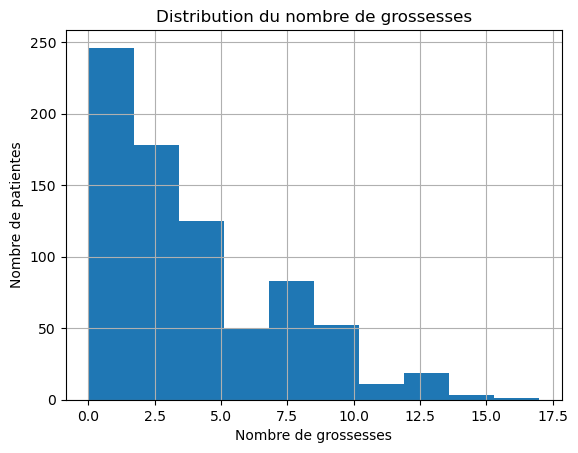

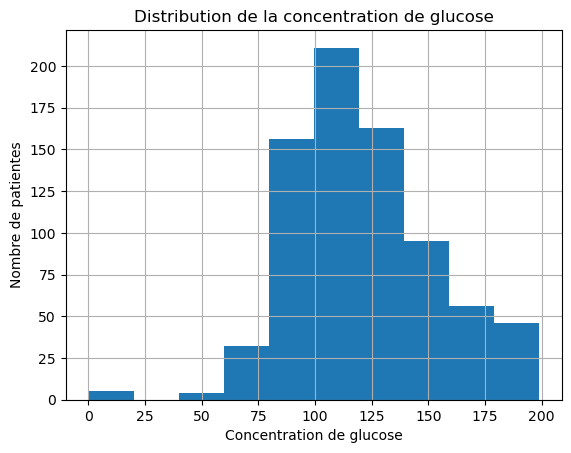

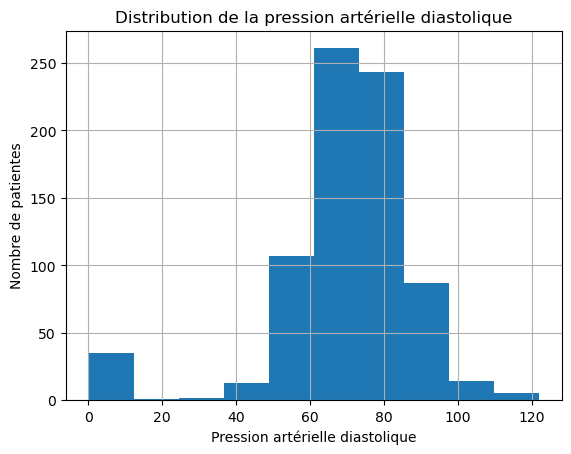

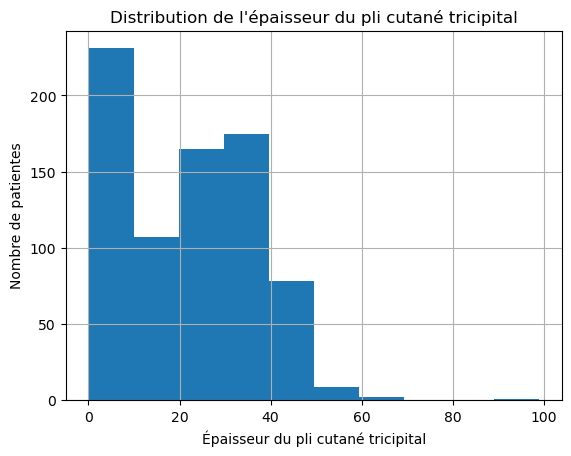

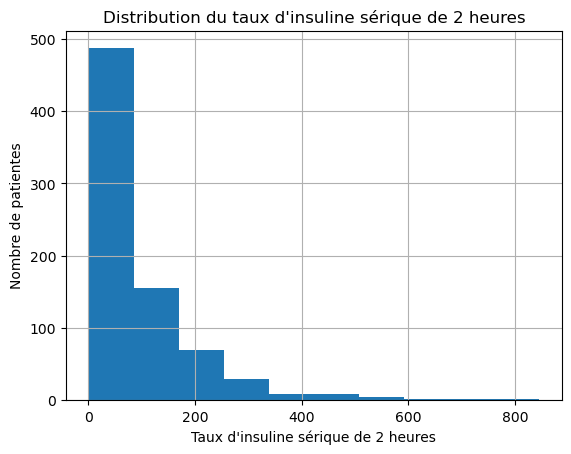

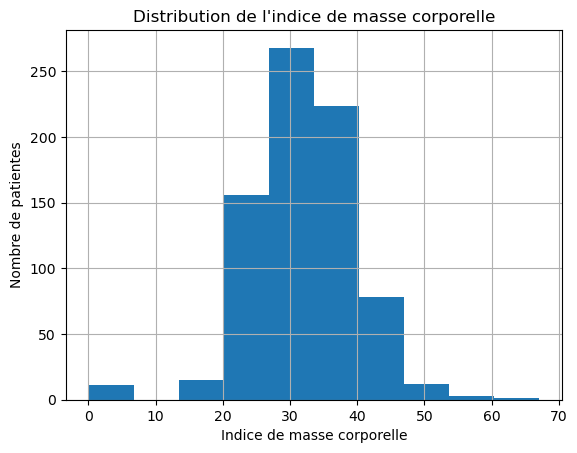

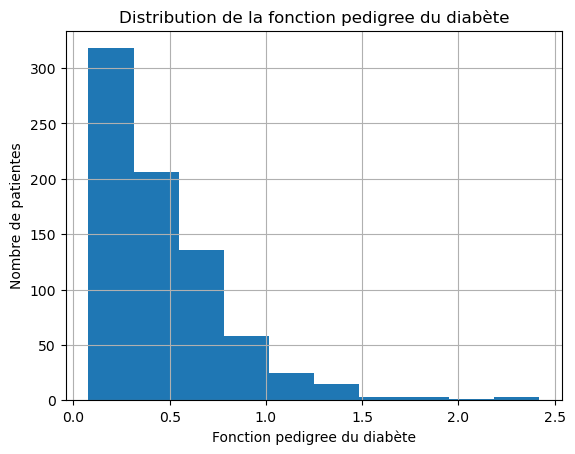

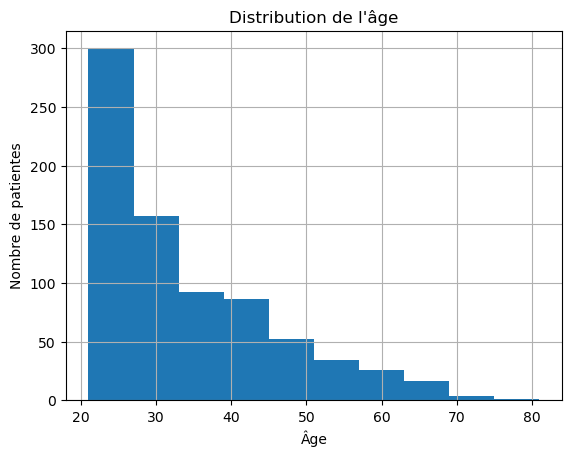

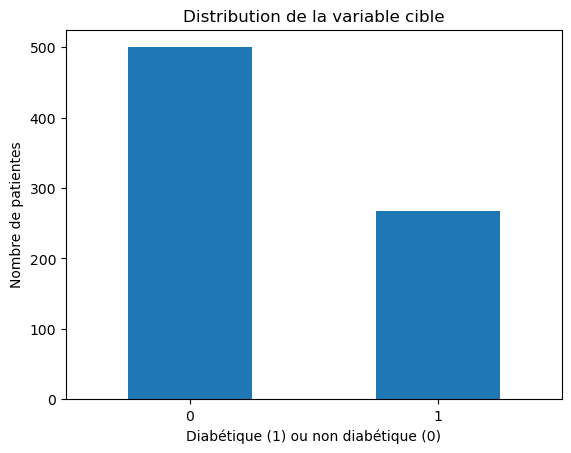

In [8]:

# Histogramme de la variable 'Pregnancies'
diabete['Pregnancies'].hist()
plt.title('Distribution du nombre de grossesses')
plt.xlabel('Nombre de grossesses')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'Glucose'
diabete['Glucose'].hist()
plt.title('Distribution de la concentration de glucose')
plt.xlabel('Concentration de glucose')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'BloodPressure'
diabete['BloodPressure'].hist()
plt.title('Distribution de la pression artérielle diastolique')
plt.xlabel('Pression artérielle diastolique')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'SkinThickness'
diabete['SkinThickness'].hist()
plt.title('Distribution de l\'épaisseur du pli cutané tricipital')
plt.xlabel('Épaisseur du pli cutané tricipital')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'Insulin'
diabete['Insulin'].hist()
plt.title('Distribution du taux d\'insuline sérique de 2 heures')
plt.xlabel('Taux d\'insuline sérique de 2 heures')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'BMI'
diabete['BMI'].hist()
plt.title('Distribution de l\'indice de masse corporelle')
plt.xlabel('Indice de masse corporelle')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'DiabetesPedigreeFunction'
diabete['DiabetesPedigreeFunction'].hist()
plt.title('Distribution de la fonction pedigree du diabète')
plt.xlabel('Fonction pedigree du diabète')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'Age'
diabete['Age'].hist()
plt.title('Distribution de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Nombre de patientes')
plt.show()

# Diagramme en barres de la variable 'Outcome'
diabete['Outcome'].value_counts().plot(kind='bar')
plt.title('Distribution de la variable cible')
plt.xlabel('Diabétique (1) ou non diabétique (0)')
plt.ylabel('Nombre de patientes')
plt.xticks(rotation=0)
plt.show()

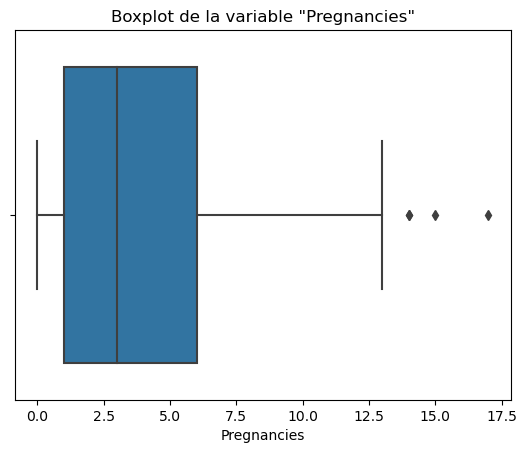

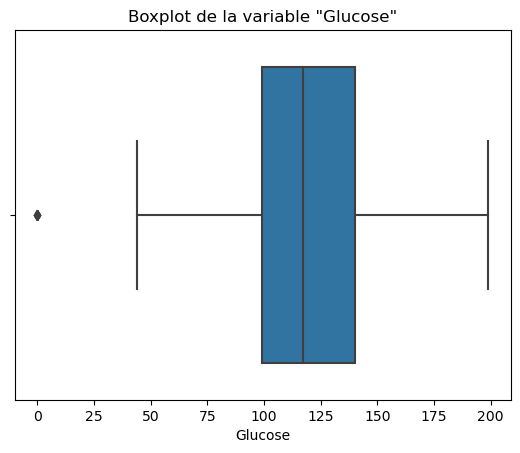

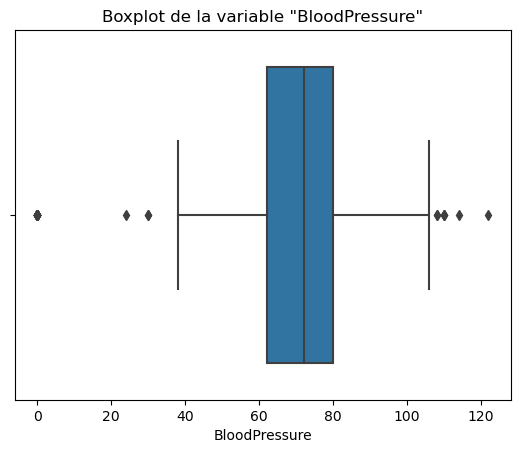

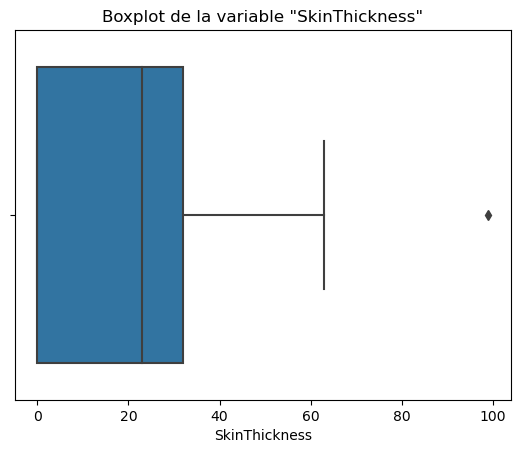

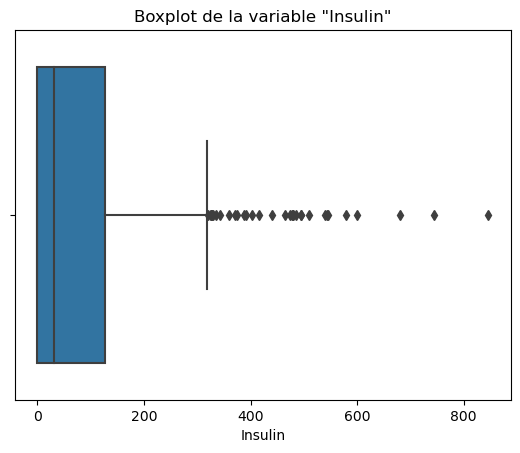

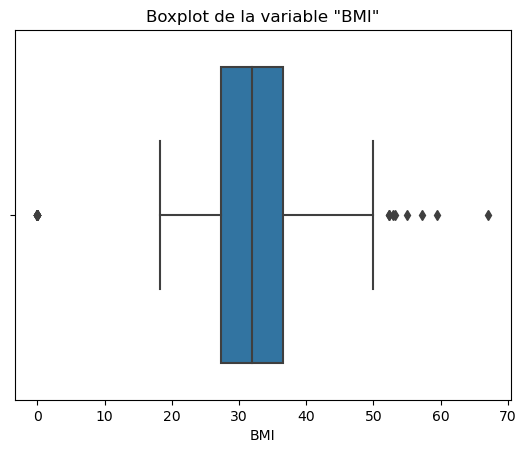

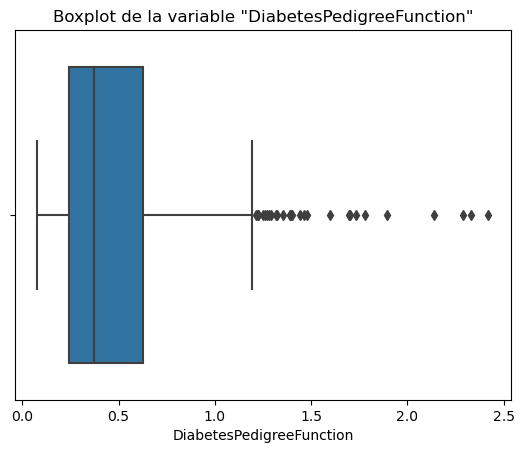

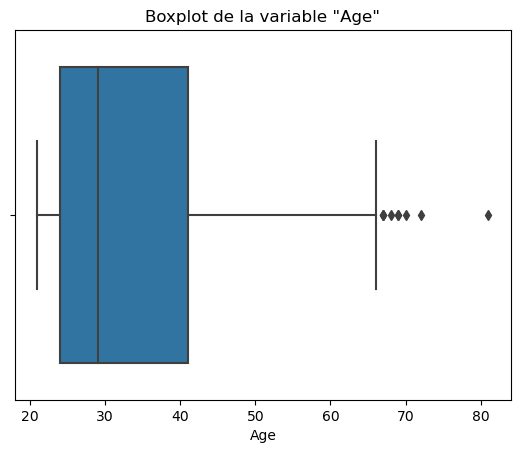

In [9]:
# Génération des boxplots pour chaque variable numérique sur des graphiques séparés
for col in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
    sns.boxplot(x=diabete[col])
    plt.title(f'Boxplot de la variable "{col}"')
    plt.show()

## Analyse des liaisons entre les variables

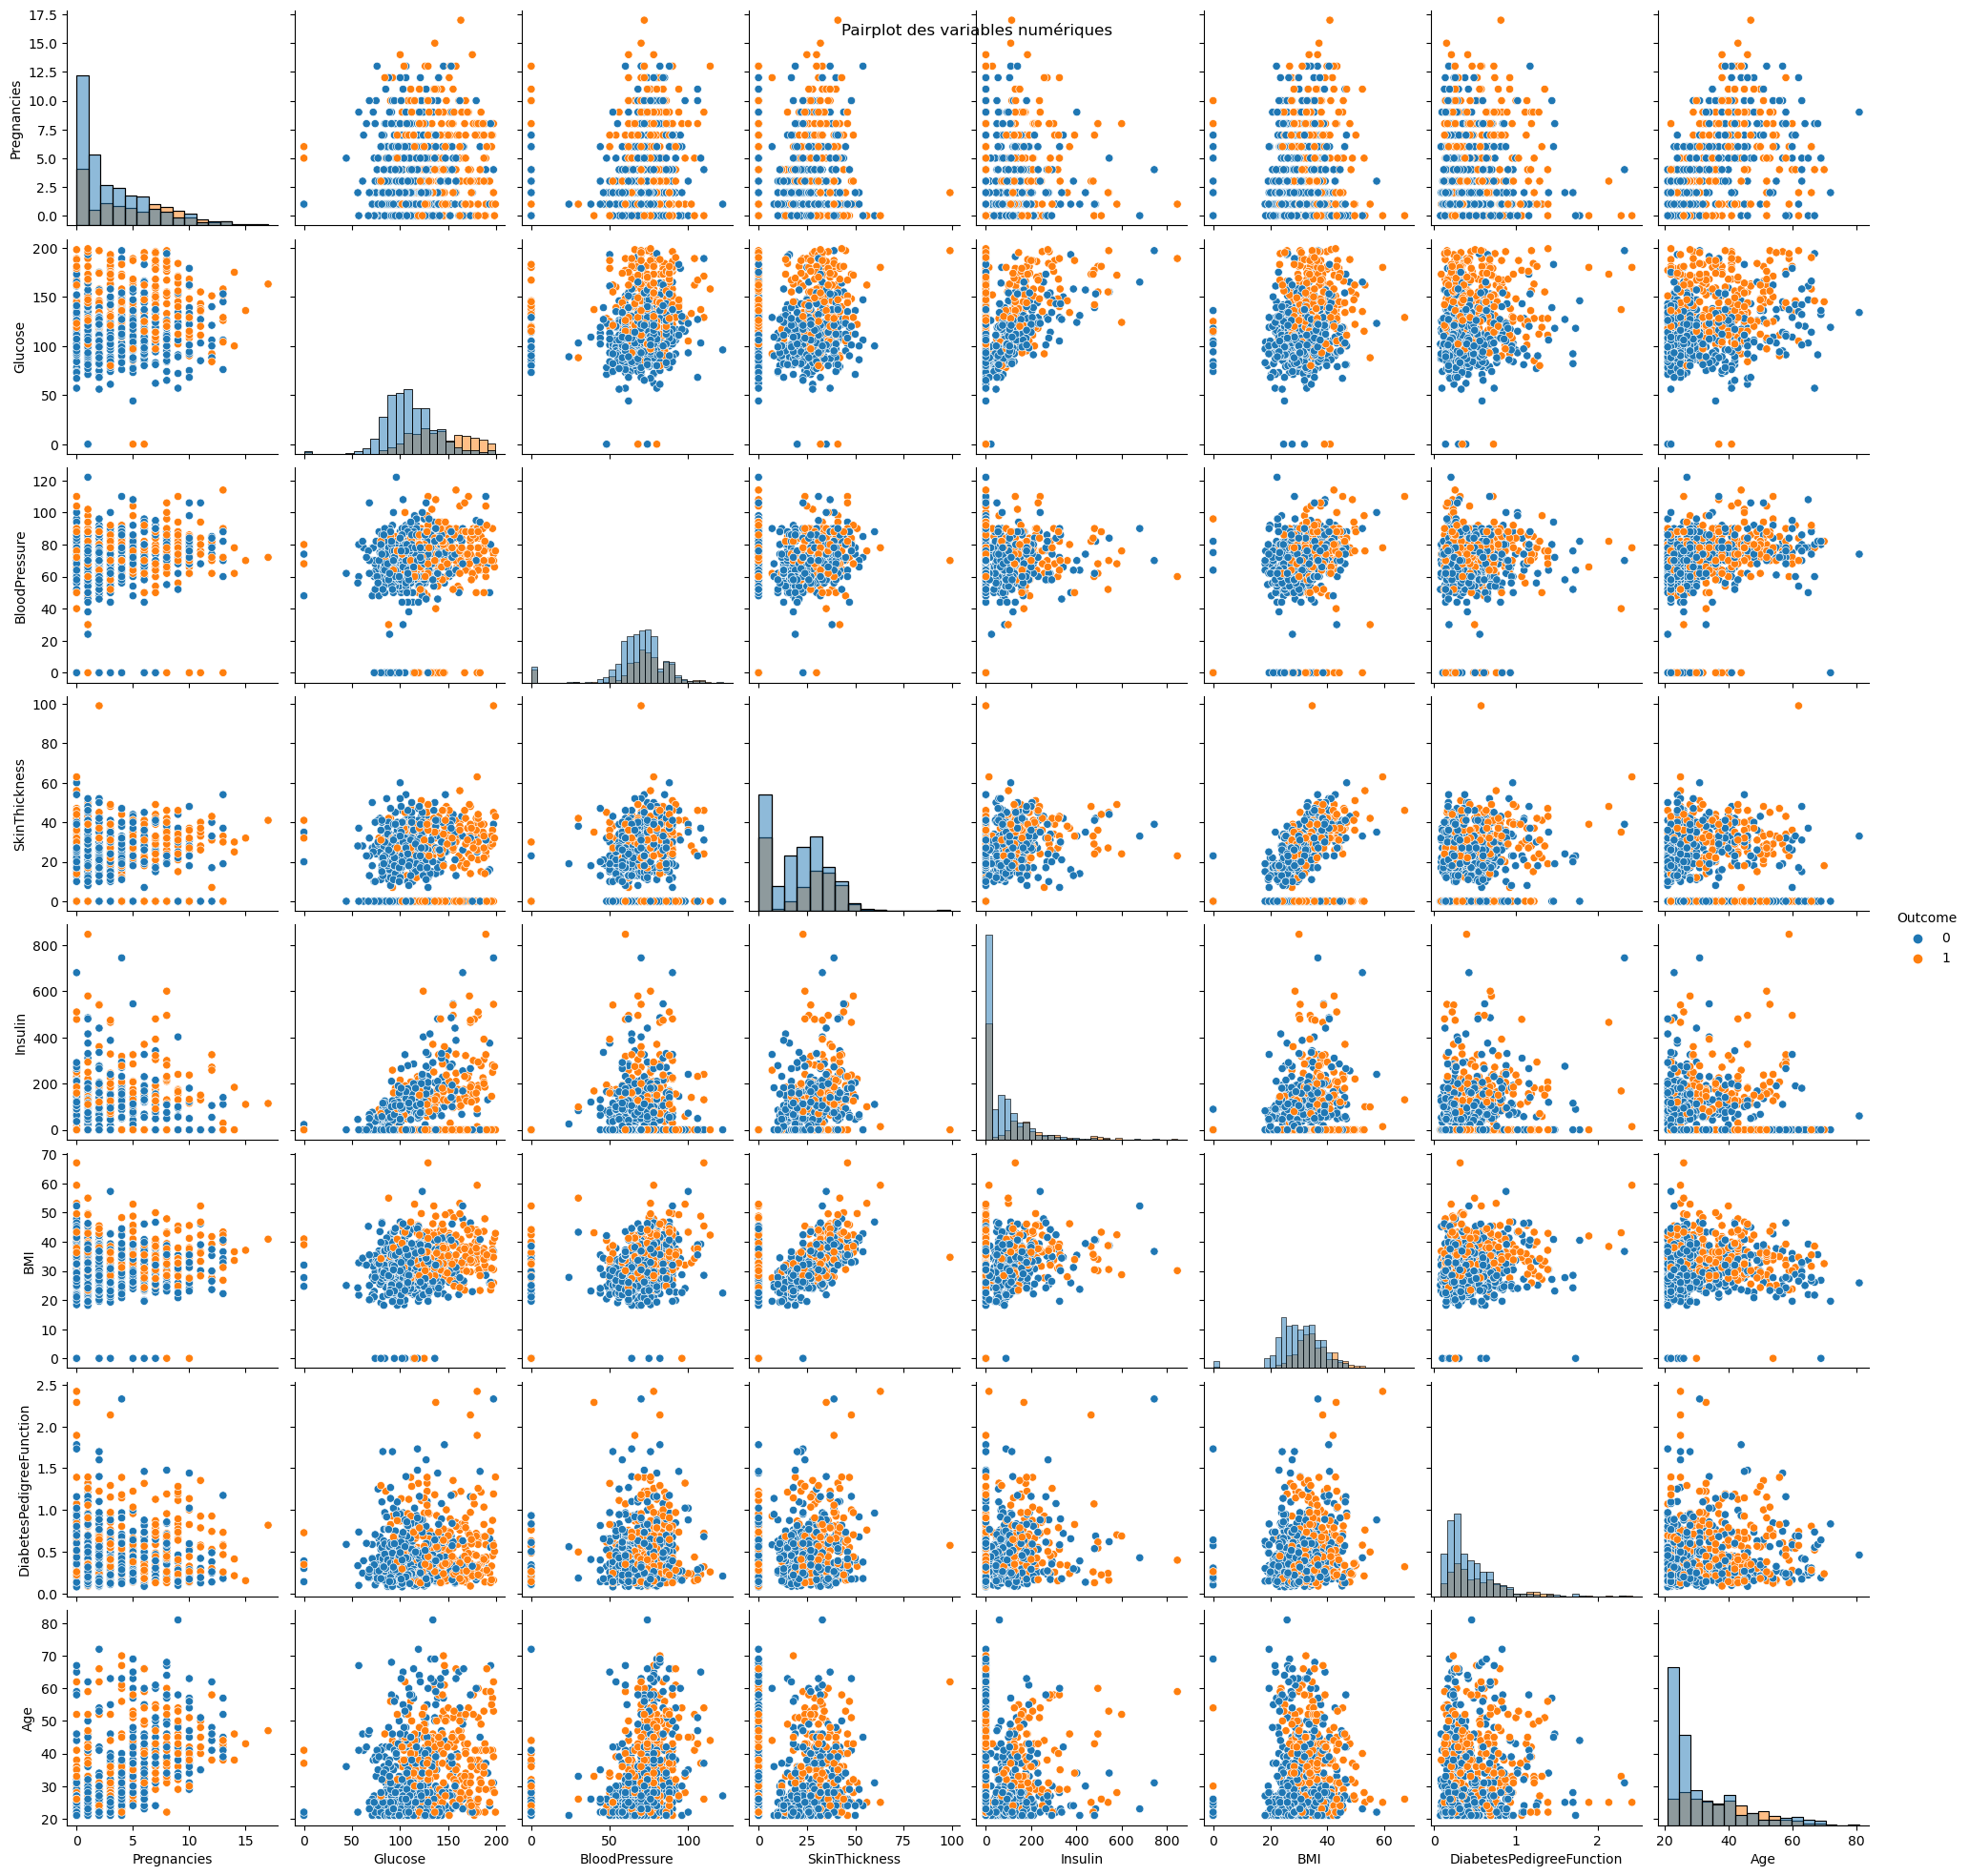

In [10]:
# Génération du pairplot
sns.pairplot(data=diabete, hue='Outcome', diag_kind='hist')
plt.suptitle('Pairplot des variables numériques')
plt.show()

In [ ]:
# Génération des boxplots bivariés pour chaque variable numérique sur des graphiques séparés
for col in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
    sns.boxplot(data=diabete, x='Outcome', y=col)
    plt.title(f'Boxplot de la variable "{col}" par rapport à la variable cible "Outcome"')
    plt.xlabel('Diabétique (1) ou non diabétique (0)')
    plt.ylabel(col)
    plt.show()

In [11]:
# Calcul des statistiques de test de Kruskal-Wallis et des p-valeurs pour chaque variable numérique
num_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

from scipy.stats import kruskal
p_values = []
for col in num_vars:
    h, pval = kruskal(diabete[col][diabete['Outcome']==0], diabete[col][diabete['Outcome']==1])
    p_values.append(pval)

    # Création d'une liste pour stocker les valeurs de significativité
is_significant = []

# Vérification de la significativité pour chaque p-valeur et stockage dans la liste is_significant
for pval in p_values:
    if pval < 0.05:
        is_significant.append('Oui')
    else:
        is_significant.append('Non')

# Affichage des résultats dans un tableau
result_table = pd.DataFrame({'Variable': num_vars, 'P-value': p_values, 'Significative': is_significant})
result_table.set_index('Variable', inplace=True)
print(result_table)



                               P-value Significative
Variable                                            
Pregnancies               3.741498e-08           Oui
Glucose                   1.198015e-39           Oui
BloodPressure             7.553110e-05           Oui
SkinThickness             1.295554e-02           Oui
Insulin                   6.563377e-02           Non
BMI                       9.716371e-18           Oui
DiabetesPedigreeFunction  1.195553e-06           Oui
Age                       1.140509e-17           Oui


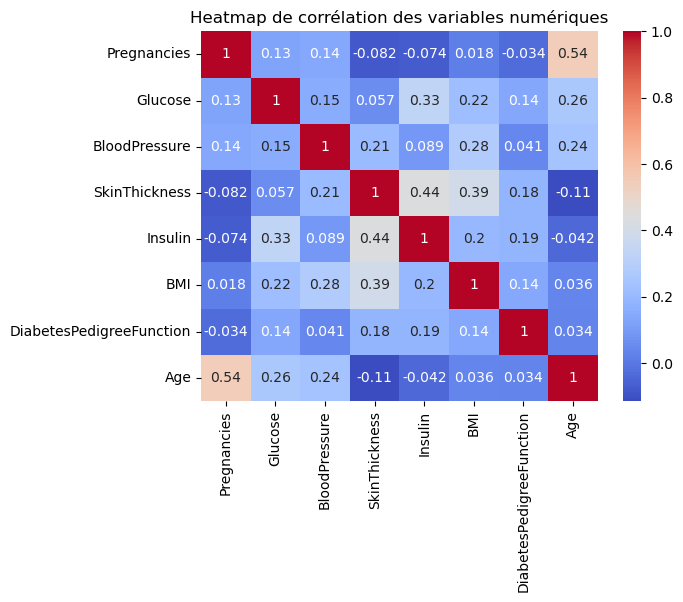

In [12]:
# Sélection des variables numériques
num_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df_num = diabete[num_vars]

# Génération de la heatmap de corrélation
sns.heatmap(df_num.corr(), cmap='coolwarm', annot=True)
plt.title('Heatmap de corrélation des variables numériques')
plt.show()

# Modélisation de l'arbre de classification

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Selection des variables

In [14]:
# Séparation des données en variables prédictives et variable cible
X = diabete.drop('Outcome', axis=1)#Variables prédictives
y = diabete['Outcome']#Variable cible
y


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Diviser la base de données en deux

In [15]:
# Division des données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Construction de l'arbre

### Premier modèle

In [16]:
# Construction de l'arbre de décision
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### Visualisation de l'arbre

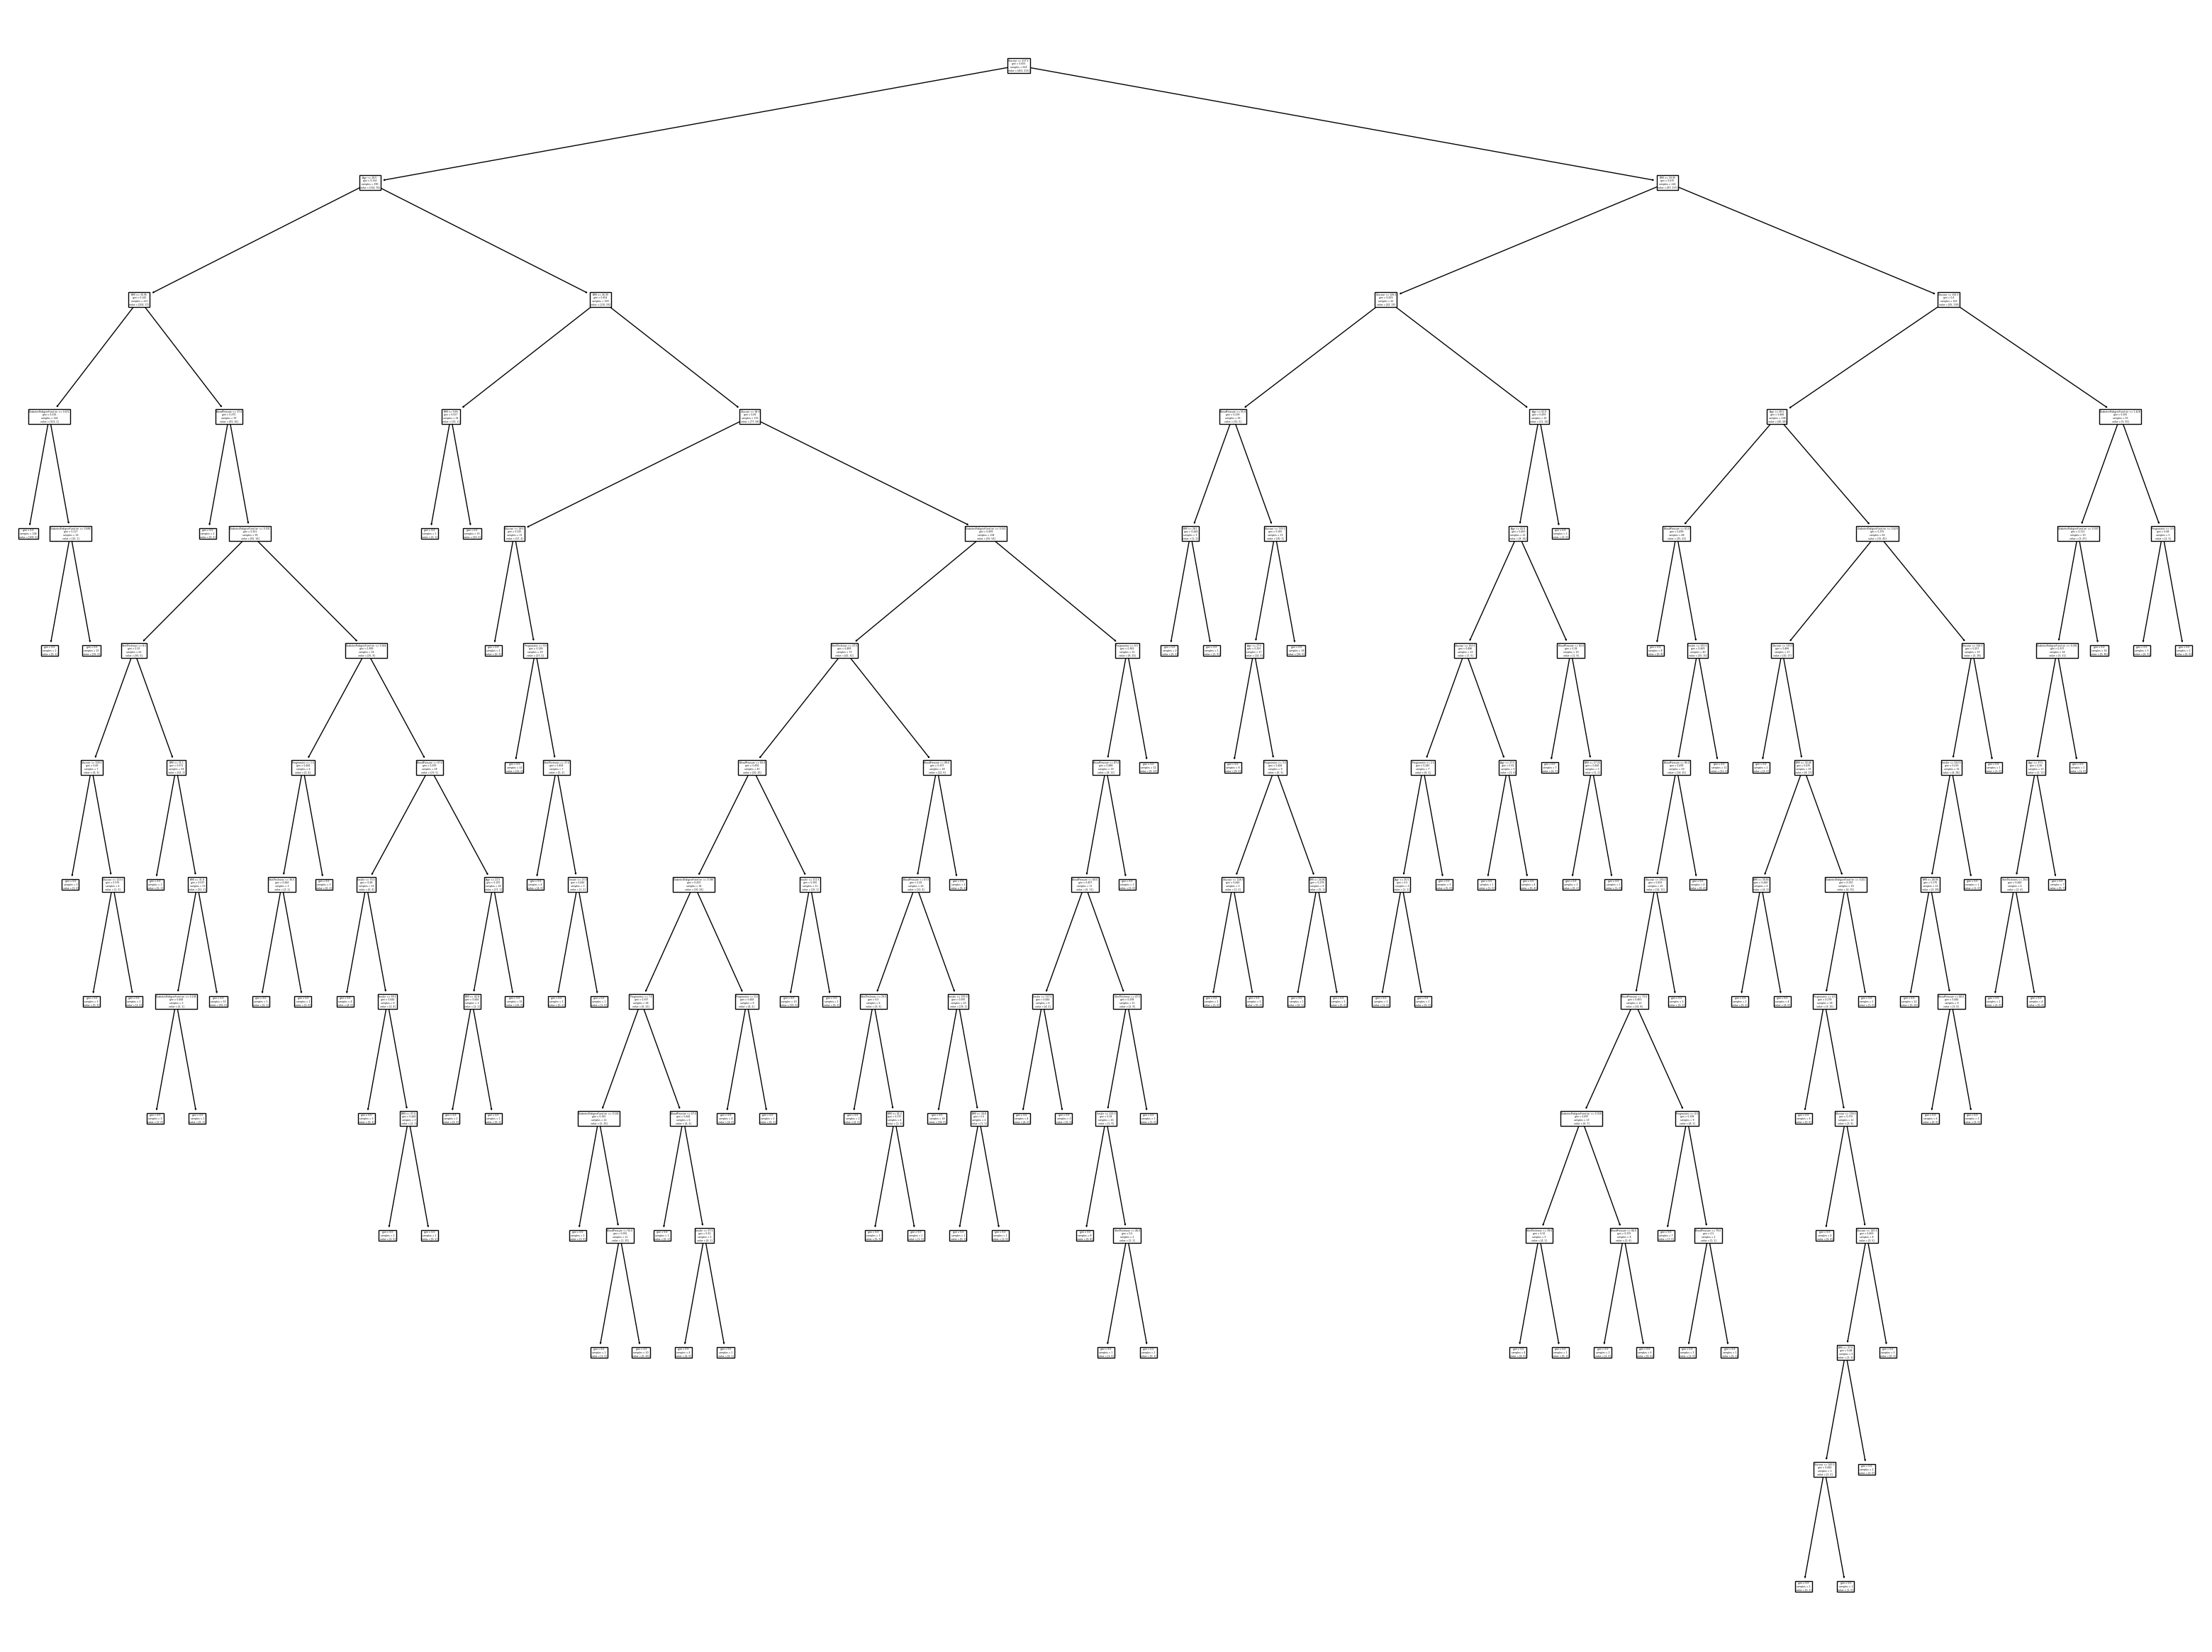

In [17]:
plt.figure(figsize=(40,30))
plot_tree(tree, feature_names=X.columns)
plt.show()

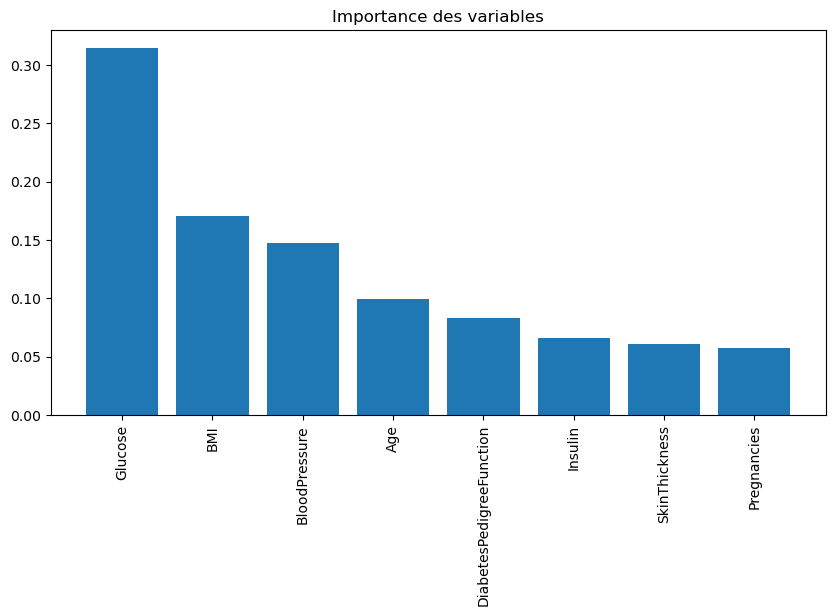

In [18]:
# Affichage de l'importance des variables
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.title("Importance des variables")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.show()

#### Evaluation des performance de l'arbre

In [19]:
# Prédictions sur l'ensemble d'entraînement
y_train_pred = tree.predict(X_train)

# Évaluation des performances sur l'ensemble d'entraînement
train_accuracy = accuracy_score(y_train, y_train_pred)
train_confusion = confusion_matrix(y_train, y_train_pred)
train_classification = classification_report(y_train, y_train_pred)

print('Performance sur la base apprentissage')
print('Train Accuracy : ', train_accuracy)
print('Train Confusion matrix : \n', train_confusion)
print('Train Classification report : \n', train_classification)

# Prédictions sur l'ensemble de test
y_test_pred = tree.predict(X_test)

# Évaluation des performances sur l'ensemble de test
print('Performance sur la base test')
test_accuracy = accuracy_score(y_test, y_test_pred)
test_confusion = confusion_matrix(y_test, y_test_pred)
test_classification = classification_report(y_test, y_test_pred)

print('Test Accuracy : ', test_accuracy)
print('Test Confusion matrix : \n', test_confusion)
print('Test Classification report : \n', test_classification)

Performance sur la base apprentissage
Train Accuracy :  1.0
Train Confusion matrix : 
 [[401   0]
 [  0 213]]
Train Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

Performance sur la base test
Test Accuracy :  0.7467532467532467
Test Confusion matrix : 
 [[75 24]
 [15 40]]
Test Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



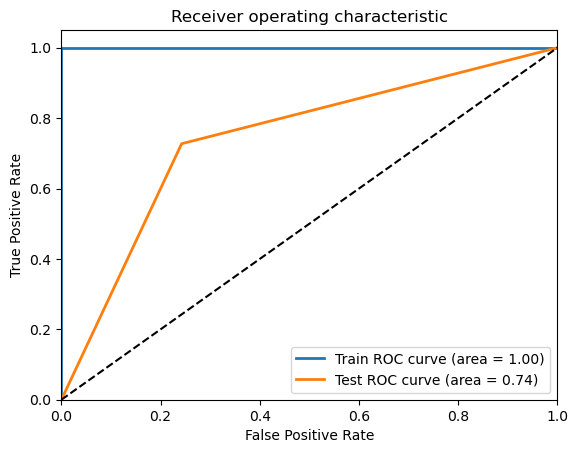

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Prédictions sur l'ensemble d'entraînement
y_train_pred = tree.predict(X_train)
y_train_prob = tree.predict_proba(X_train)[:, 1]

# Prédictions sur l'ensemble de test
y_test_pred = tree.predict(X_test)
y_test_prob = tree.predict_proba(X_test)[:, 1]


# Courbe ROC pour la base train
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
roc_auc_train = roc_auc_score(y_train, y_train_prob)

# Courbe ROC pour la base test
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)

plt.figure()
plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = %0.2f)' % roc_auc_train, linewidth=2)
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % roc_auc_test, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Optimisation de l'arbre de décision

L'optimisation de l'arbre de régression consiste à trouver les paramètres optimaux qui permettent de construire un arbre qui généralise bien sur de nouvelles données. Voici les paramètres que nous pouvons optimiser pour l'arbre de régression :

- criterion : le critère de sélection des attributs. Les critères supportés sont **"mse"** pour l'erreur quadratique moyenne et "friedman_mse" pour l'erreur quadratique moyenne de Friedman.
- splitter : la stratégie de division des nœuds. Les stratégies supportées sont **"best"** pour choisir la meilleure division et "random" pour choisir une division aléatoire.
- max_depth : la profondeur maximale de l'arbre. Si None, les nœuds sont étendus jusqu'à ce que toutes les feuilles contiennent moins d'échantillons que **min_samples_split**. Une valeur élevée de profondeur maximale provoque un surajustement, et une valeur basse provoque un sous-ajustement.

Dans scikit-learn, l'optimisation de l'arbre de régression est effectuée par pré-élagage. La profondeur maximale de l'arbre peut être utilisée comme variable de contrôle pour le pré-élagage. En réduisant la profondeur maximale, nous pouvons contrôler la complexité de l'arbre et éviter le surajustement.

Il est également possible d'essayer d'autres critères de sélection d'attributs, tels que l'erreur absolue moyenne. Il est recommandé d'utiliser la validation croisée pour trouver les meilleurs paramètres pour l'arbre de régression.


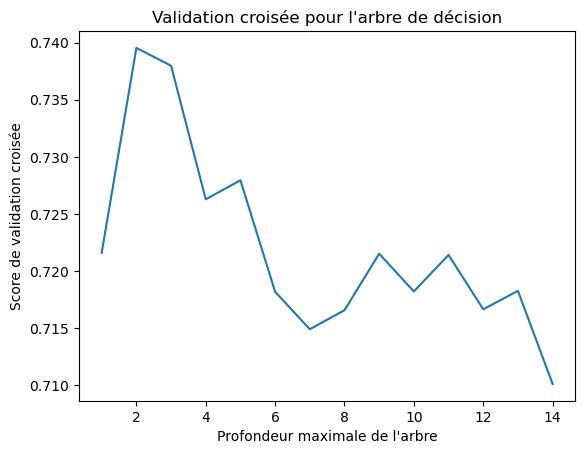

In [21]:
# Liste des profondeurs maximales à tester
max_depths = range(1, 15)

# Liste pour stocker les scores de validation croisée
cv_scores = []

# Pour chaque profondeur maximale, entraîner un arbre de décision et calculer le score de validation croisée
for depth in max_depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(tree, X_train, y_train, cv=10)
    cv_scores.append(np.mean(scores))

# Tracer le graphique de validation croisée pour choisir la complexité de l'arbre optimal
plt.plot(max_depths, cv_scores)
plt.xlabel('Profondeur maximale de l\'arbre')
plt.ylabel('Score de validation croisée')
plt.title('Validation croisée pour l\'arbre de décision')
plt.show()


In [22]:
# Trouver la profondeur maximale qui donne le meilleur score de validation croisée
best_depth = max_depths[np.argmax(cv_scores)]
print('La meilleure profondeur maximale est :', best_depth)


La meilleure profondeur maximale est : 2


In [23]:
# Construire l'arbre de décision avec la profondeur maximale choisie
tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2, random_state=42)

#### Visualisation de l'arbre

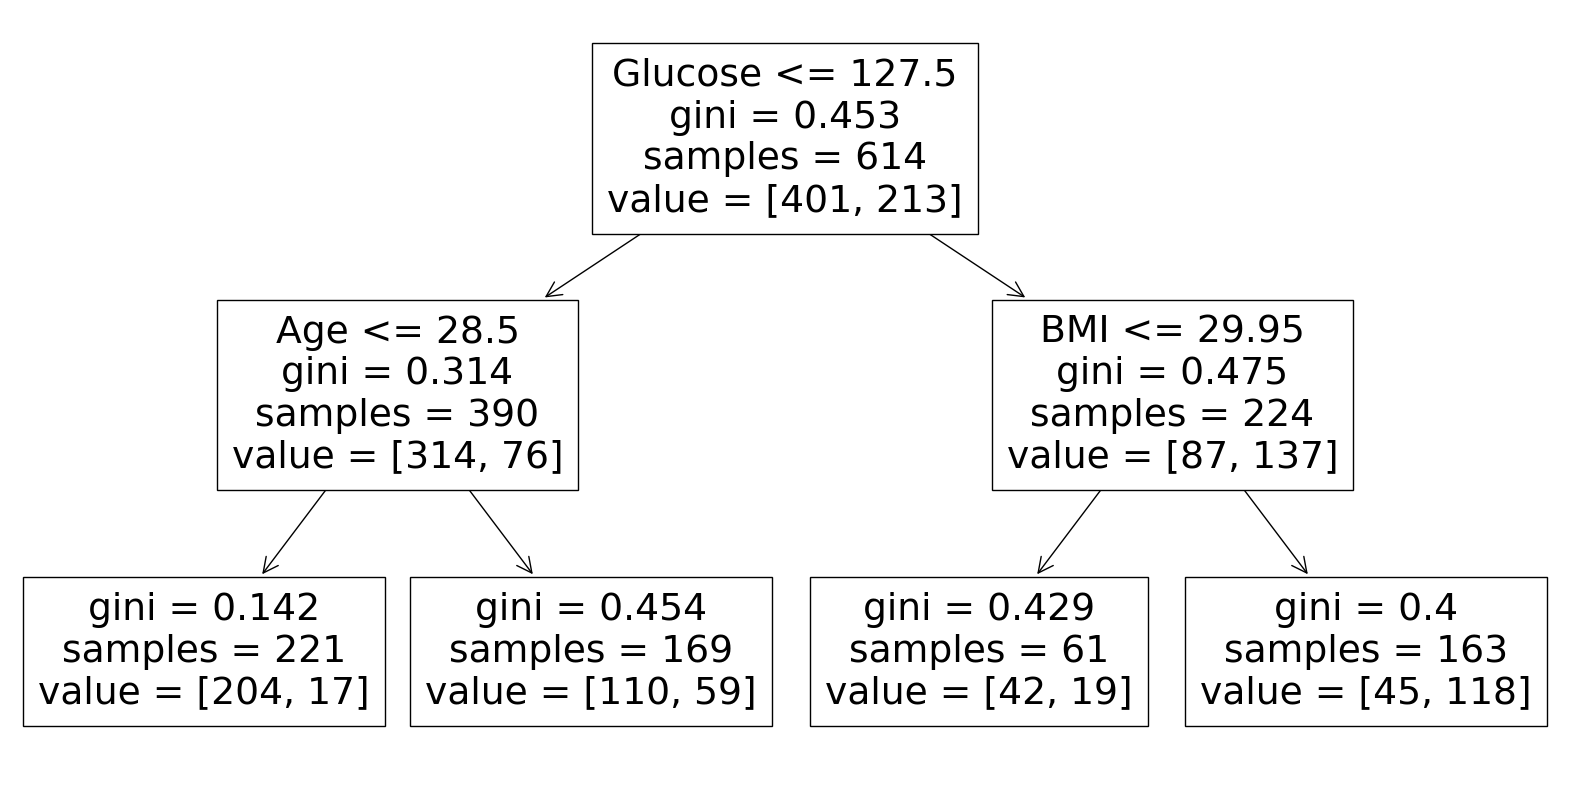

In [24]:
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X.columns)
plt.show()

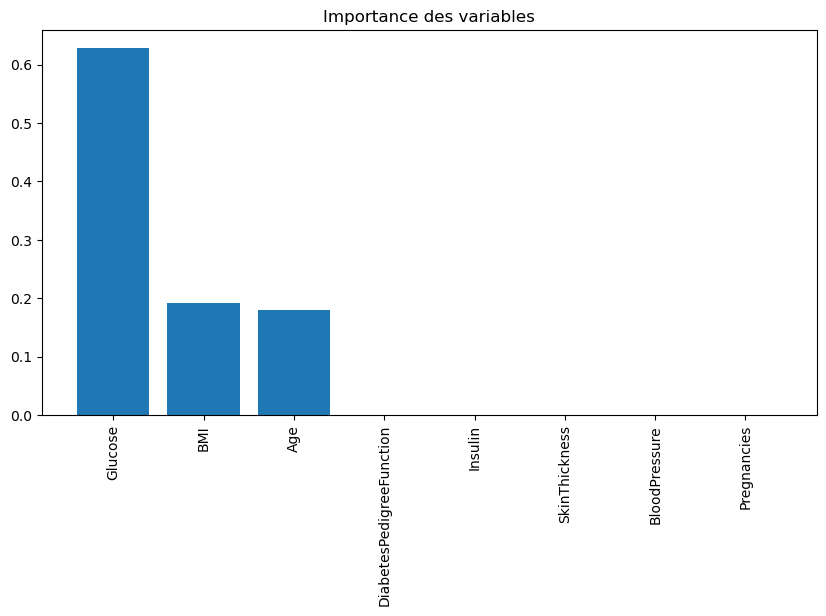

In [25]:
# Affichage de l'importance des variables
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.title("Importance des variables")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.show()

#### Performance d l'arbre optimal

# Prédictions sur l'ensemble d'entraînement
y_train_pred = tree.predict(X_train)

# Évaluation des performances sur l'ensemble d'entraînement
train_accuracy = accuracy_score(y_train, y_train_pred)
train_confusion = confusion_matrix(y_train, y_train_pred)
train_classification = classification_report(y_train, y_train_pred)

print('Performance sur la base apprentissage')
print('Train Accuracy : ', train_accuracy)
print('Train Confusion matrix : \n', train_confusion)
print('Train Classification report : \n', train_classification)

# Prédictions sur l'ensemble de test
y_test_pred = tree.predict(X_test)

# Évaluation des performances sur l'ensemble de test
print('Performance sur la base test')
test_accuracy = accuracy_score(y_test, y_test_pred)
test_confusion = confusion_matrix(y_test, y_test_pred)
test_classification = classification_report(y_test, y_test_pred)

print('Test Accuracy : ', test_accuracy)
print('Test Confusion matrix : \n', test_confusion)
print('Test Classification report : \n', test_classification)

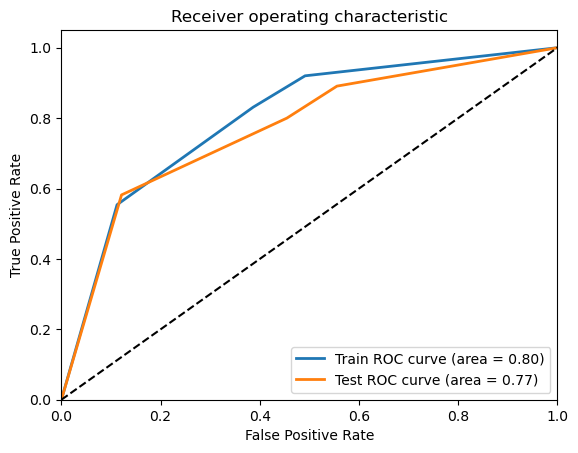

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Prédictions sur l'ensemble d'entraînement
y_train_pred = tree.predict(X_train)
y_train_prob = tree.predict_proba(X_train)[:, 1]

# Prédictions sur l'ensemble de test
y_test_pred = tree.predict(X_test)
y_test_prob = tree.predict_proba(X_test)[:, 1]


# Courbe ROC pour la base train
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
roc_auc_train = roc_auc_score(y_train, y_train_prob)

# Courbe ROC pour la base test
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)

plt.figure()
plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = %0.2f)' % roc_auc_train, linewidth=2)
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % roc_auc_test, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Modélisation Random Forest (Forêt Aléatoire)

## Modèle sans optimisation

### Préparation des données pour le modèle

In [28]:
from sklearn.model_selection import train_test_split

X = diabete.drop('Outcome', axis=1)  # Variables prédictives
y = diabete['Outcome']  # Variable cible

# Diviser la base de données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Création et entraînement du modèle de forêt aléatoire

In [29]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(oob_score=True)
random_forest.fit(X_train, y_train)


RandomForestClassifier(oob_score=True)

### Prédiction sur la base d'apprentissage et la base de test

In [30]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score

# Prédire les classes sur les ensembles d'entraînement et de test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

### Evaluation des performances du modèle

In [31]:
# Calculer les mesures de performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

# Créer le tableau d'évaluation des performances
performance_table = pd.DataFrame({
    'Métrique': ['Accuracy', 'AUC', 'Recall'],
    'Ensemble d\'entraînement': [train_accuracy, train_auc, train_recall],
    'Ensemble de test': [test_accuracy, test_auc, test_recall]
})

# Afficher le tableau d'évaluation des performances
print(performance_table)

   Métrique  Ensemble d'entraînement  Ensemble de test
0  Accuracy                      1.0          0.733766
1       AUC                      1.0          0.712121
2    Recall                      1.0          0.636364


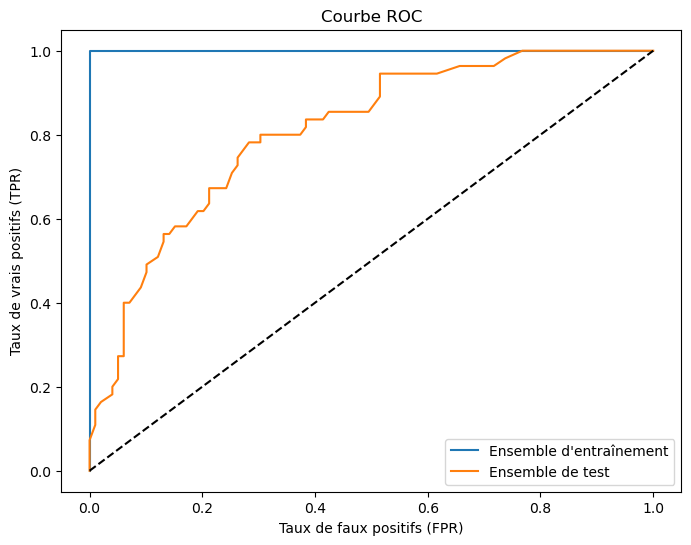

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Obtenir les scores de probabilité pour les classes positives
y_train_prob = random_forest.predict_proba(X_train)[:, 1]
y_test_prob = random_forest.predict_proba(X_test)[:, 1]

# Calculer les taux de faux positifs (FPR) et les taux de vrais positifs (TPR)
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)

# Tracer les courbes ROC
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label='Ensemble d\'entraînement')
plt.plot(test_fpr, test_tpr, label='Ensemble de test')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend()
plt.show()


### Analyse de l'importance des variables

Importance des variables :
                   Variable  Importance
0                   Glucose    0.257843
1                       BMI    0.162301
2                       Age    0.152223
3  DiabetesPedigreeFunction    0.115688
4             BloodPressure    0.089686
5                   Insulin    0.078175
6               Pregnancies    0.075322
7             SkinThickness    0.068762



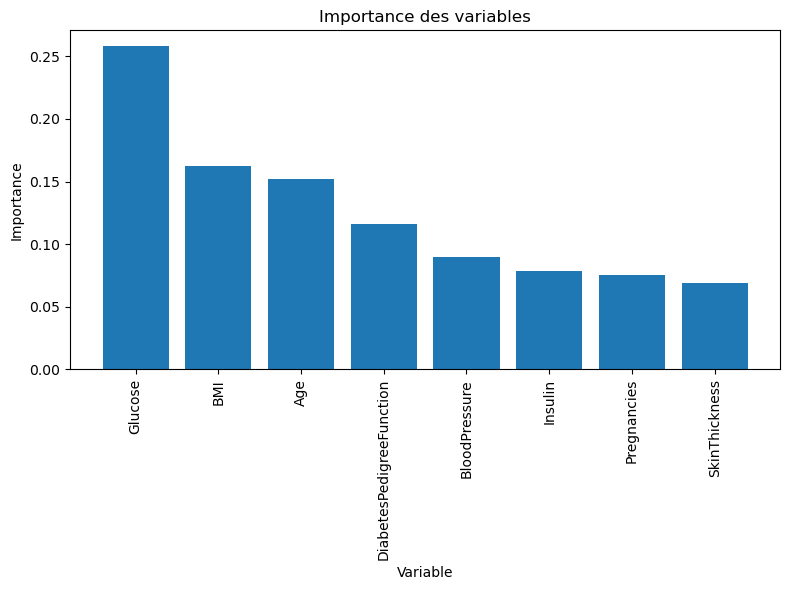

In [33]:
# Obtenir l'importance des variables
importance = random_forest.feature_importances_

# Créer un DataFrame pour afficher l'importance des variables
importance_df = pd.DataFrame({'Variable': X.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Afficher l'importance des variables
print("Importance des variables :")
print(importance_df)
print()

# Tracer l'importance des variables
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Variable'], importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Importance des variables')
plt.tight_layout()
plt.show()

## Modèle avec optimisation en utilisant les seuil pratique

Lorsque l'on utilise une forêt aléatoire, il est essentiel de faire des choix judicieux pour certains paramètres afin d'optimiser les performances du modèle. Deux paramètres importants à considérer sont :

- `max_features` : Il s'agit de la profondeur maximale de chaque arbre de décision dans la forêt. Une valeur appropriée pour `max_features` permet de contrôler la complexité du modèle et d'éviter le surajustement (overfitting).

**Une approche courante consiste à fixer `max_features` à la racine carrée du nombre de variables utilisées**. Cela permet de limiter la profondeur des arbres et de prévenir une croissance excessive, tout en maintenant un bon équilibre entre sous-apprentissage et surapprentissage.

- `n_estimators` : Il s'agit du nombre d'arbres de décision dans la forêt aléatoire. Un nombre suffisamment grand d'arbres permet d'améliorer les performances du modèle. Cependant, il est important de noter que l'augmentation de `n_estimators` entraîne également une augmentation du temps de calcul. Dans la pratique, on cherche à trouver un compromis entre les performances du modèle et le temps de calcul disponible. 


**Des études empiriques ont montré que l'ajout d'arbres après un certain point n'apporte que des gains marginaux en termes de performance**.

En ajustant ces paramètres de manière appropriée, on peut obtenir une forêt aléatoire bien équilibrée et performante pour la tâche donnée.


### Entrainement du modèle

In [34]:
# Calculer le nombre maximum de variables (max_features) à la racine carrée
max_features = int(np.sqrt(X.shape[1]))

# Créer la forêt aléatoire avec les hyperparamètres fixés
random_forest = RandomForestClassifier(n_estimators=100, max_features=max_features, random_state=42,oob_score=True)

# Entraîner le modèle sur les données d'entraînement
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_features=2, oob_score=True, random_state=42)

### Prédiction sur les bases train et test

In [35]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score

# Prédire les classes sur les ensembles d'entraînement et de test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)


### Performances du modèle

In [36]:

# Calculer les mesures de performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

# Créer le tableau d'évaluation des performances
performance_table = pd.DataFrame({
    'Métrique': ['Accuracy', 'AUC', 'Recall'],
    'Ensemble d\'entraînement': [train_accuracy, train_auc, train_recall],
    'Ensemble de test': [test_accuracy, test_auc, test_recall]
})

# Afficher le tableau d'évaluation des performances
print(performance_table)


   Métrique  Ensemble d'entraînement  Ensemble de test
0  Accuracy                      1.0          0.720779
1       AUC                      1.0          0.697980
2    Recall                      1.0          0.618182


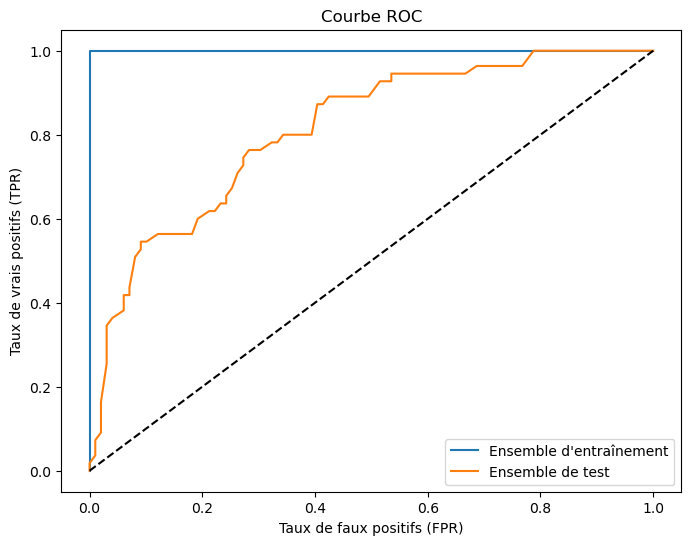

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Obtenir les scores de probabilité pour les classes positives
y_train_prob = random_forest.predict_proba(X_train)[:, 1]
y_test_prob = random_forest.predict_proba(X_test)[:, 1]

# Calculer les taux de faux positifs (FPR) et les taux de vrais positifs (TPR)
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)

# Tracer les courbes ROC
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label='Ensemble d\'entraînement')
plt.plot(test_fpr, test_tpr, label='Ensemble de test')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend()
plt.show()


### Importance des variables

Importance des variables :
                   Variable  Importance
0                   Glucose    0.258864
1                       BMI    0.169984
2                       Age    0.140931
3  DiabetesPedigreeFunction    0.123768
4             BloodPressure    0.088134
5               Pregnancies    0.076551
6                   Insulin    0.076122
7             SkinThickness    0.065646



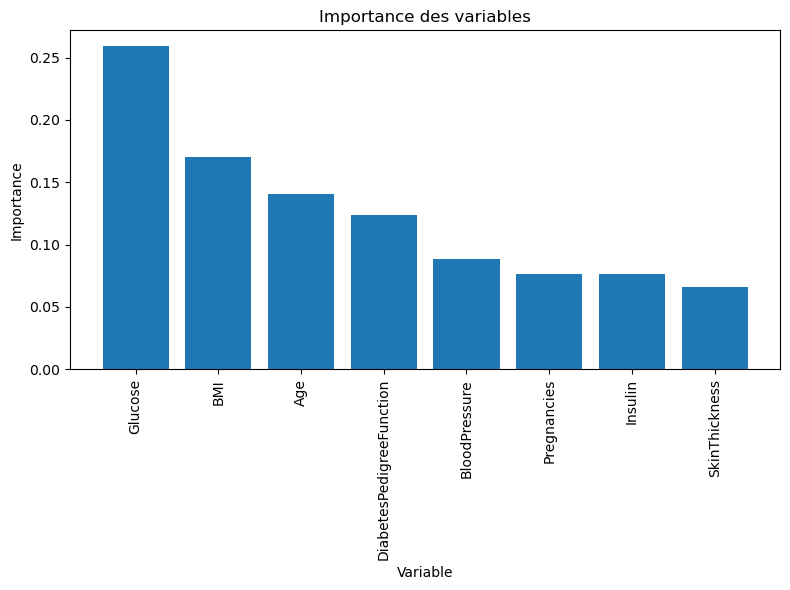

In [38]:
# Obtenir l'importance des variables
importance = random_forest.feature_importances_

# Créer un DataFrame pour afficher l'importance des variables
importance_df = pd.DataFrame({'Variable': X.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Afficher l'importance des variables
print("Importance des variables :")
print(importance_df)
print()

# Tracer l'importance des variables
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Variable'], importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Importance des variables')
plt.tight_layout()
plt.show()

## Modèle avec optimisation via la validation croisée

Lors de l'utilisation d'une forêt aléatoire, certains paramètres sont essentiels à optimiser pour obtenir de bonnes performances du modèle. Voici les paramètres les plus importants à prendre en compte :

- `n_estimators` : Il s'agit du nombre d'arbres de décision dans la forêt aléatoire. Augmenter ce nombre peut améliorer les performances du modèle, mais cela entraîne également une augmentation du temps de calcul.



- `max_depth` : C'est la profondeur maximale de chaque arbre de décision. Une valeur plus élevée permet à l'arbre d'apprendre des relations plus complexes dans les données, mais elle peut également conduire à un surajustement. Il est important de trouver un équilibre pour éviter l'overfitting.



- `min_samples_split` : Ce paramètre définit le nombre minimum d'échantillons requis pour scinder un nœud. Une valeur plus élevée peut conduire à des arbres plus simples et éviter l'overfitting, mais cela peut également entraîner une sous-représentation des informations dans les données.




Il est recommandé d'utiliser des techniques d'optimisation telles que la recherche par grille (GridSearch) ou la recherche aléatoire (RandomizedSearch) pour explorer différentes combinaisons de ces paramètres et trouver ceux qui fournissent les meilleures performances pour votre problème spécifique.


### Entrainement du modèle

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Définir les hyperparamètres à tester à l'aide de GridSearch
param_grid = {
    'n_estimators': [100, 200, 300,500],
    'max_depth': [1,2,3,4,6,7,8]
}

# Créer un modèle de forêt aléatoire
rf_model = RandomForestClassifier(oob_score=True, random_state=42)

# Utiliser GridSearch pour trouver les meilleurs paramètres
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres :", grid_search.best_params_)

Meilleurs paramètres : {'max_depth': 8, 'n_estimators': 100}


In [42]:
# Créer un modèle de forêt aléatoire avec les meilleurs paramètres
random_forest = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'], oob_score=True, random_state=42)
# Entraîner le modèle sur les données d'entraînement
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, oob_score=True, random_state=42)

### Prédiction sur les bases train et test

In [43]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score

# Prédire les classes sur les ensembles d'entraînement et de test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)


### Performance de la forêt aléatoire

In [44]:

# Calculer les mesures de performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

# Créer le tableau d'évaluation des performances
performance_table = pd.DataFrame({
    'Métrique': ['Accuracy', 'AUC', 'Recall'],
    'Ensemble d\'entraînement': [train_accuracy, train_auc, train_recall],
    'Ensemble de test': [test_accuracy, test_auc, test_recall]
})

# Afficher le tableau d'évaluation des performances
print(performance_table)


   Métrique  Ensemble d'entraînement  Ensemble de test
0  Accuracy                 0.965798          0.746753
1       AUC                 0.950704          0.722222
2    Recall                 0.901408          0.636364


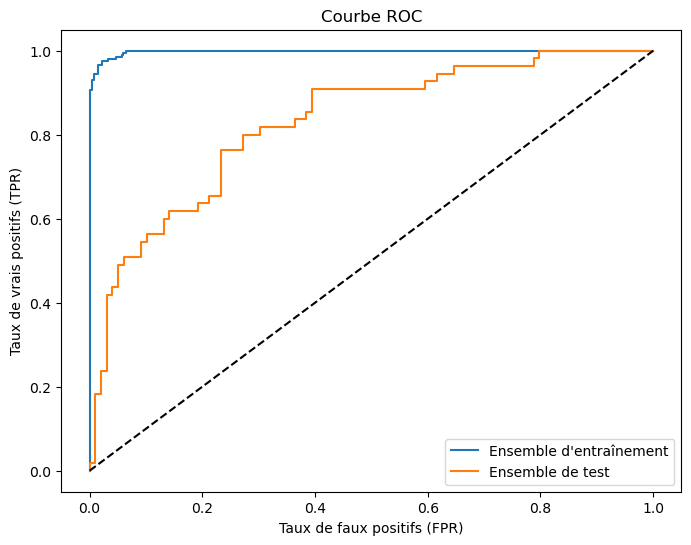

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Obtenir les scores de probabilité pour les classes positives
y_train_prob = random_forest.predict_proba(X_train)[:, 1]
y_test_prob = random_forest.predict_proba(X_test)[:, 1]

# Calculer les taux de faux positifs (FPR) et les taux de vrais positifs (TPR)
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)

# Tracer les courbes ROC
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label='Ensemble d\'entraînement')
plt.plot(test_fpr, test_tpr, label='Ensemble de test')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend()
plt.show()


### Importance des variables

Importance des variables :
                   Variable  Importance
0                   Glucose    0.288725
1                       BMI    0.173107
2                       Age    0.145240
3  DiabetesPedigreeFunction    0.111973
4                   Insulin    0.078125
5             BloodPressure    0.076784
6               Pregnancies    0.069068
7             SkinThickness    0.056977



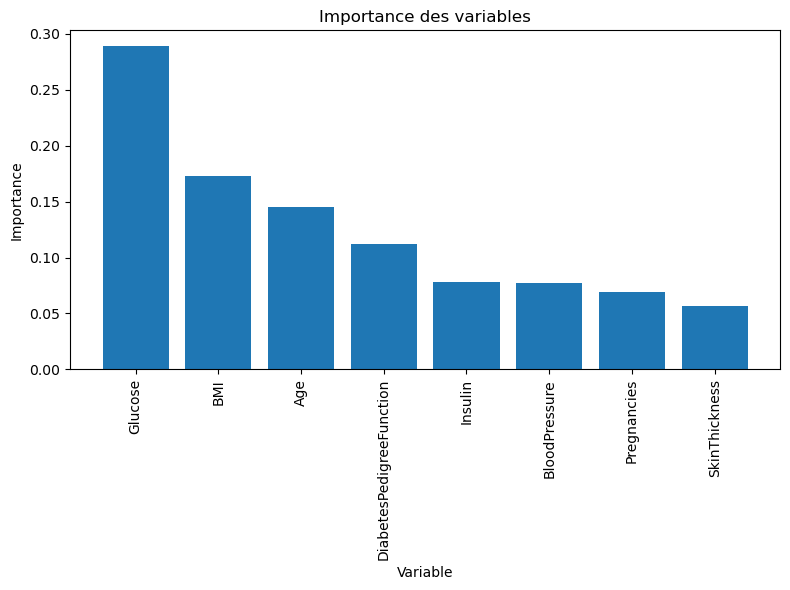

In [46]:
# Obtenir l'importance des variables
importance = random_forest.feature_importances_

# Créer un DataFrame pour afficher l'importance des variables
importance_df = pd.DataFrame({'Variable': X.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Afficher l'importance des variables
print("Importance des variables :")
print(importance_df)
print()

# Tracer l'importance des variables
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Variable'], importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Importance des variables')
plt.tight_layout()
plt.show()

# Quizz

## Quiz sur l'implémentation des forêts aléatoires pour la classification en Python

1. Qu'est-ce qu'une forêt aléatoire (random forest) ?
   - a) Un algorithme de classification basé sur des arbres de décision multiples
   - b) Une méthode d'apprentissage non supervisée utilisée pour regrouper les données
   - c) Une technique d'optimisation pour les réseaux de neurones profonds
   - d) Un algorithme de compression de données

2. Comment les forêts aléatoires prennent-elles des décisions de classification ?
   - a) En utilisant la règle de Bayes
   - b) En réalisant un vote à la majorité des prédictions de plusieurs arbres de décision
   - c) En utilisant la descente de gradient stochastique
   - d) En appliquant une transformation de Fourier discrète

3. Quels sont les paramètres les plus importants à optimiser lors de l'utilisation des forêts aléatoires pour la classification en Python ?
   - a) Le nombre d'arbres dans la forêt
   - b) La profondeur maximale des arbres
   - c) Le nombre de variables à considérer lors de la recherche de la meilleure séparation à chaque nœud
   - d) Tous les choix ci-dessus

4. Comment le nombre de variables impacte-t-il la construction de chaque arbre de décision dans une forêt aléatoire ?
   - a) Plus le nombre de variables est élevé, plus les arbres seront profonds
   - b) Plus le nombre de variables est élevé, plus les arbres seront peu profonds
   - c) Le nombre de variables n'a pas d'impact sur la construction des arbres
   - d) Un nombre équilibré de variables est préférable pour la construction des arbres


